In [33]:
#### Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#### Part I - Data Preparation and Wrangling

***Data Loading and Preparation***:

  - Are there any missing values? Ideally, there shouldn't be any.
  - Are there any variables which are of an incorrect datatype? For e.g. categorical columns are stored as integers in the data set. In case you encounter such issues, make sure you convert the columns to the correct datatypes.

In [34]:
## Load the dataset
df = pd.read_csv(r"C:\Users\adity\Downloads\data_app.csv")
df

,CustomerID,Adopt,Gender,Age,Nationality,Loyalty,Tenure,Post,NumBookings,Spending
0,1001,1,Male,34,1,2,57,1,18,5760
1,1002,1,Female,36,1,2,5,1,6,1830
2,1003,1,Female,43,1,1,12,1,9,2682
3,1004,1,Male,47,1,1,70,1,21,6846
4,1005,1,Male,41,1,2,13,1,11,3377
...,...,...,...,...,...,...,...,...,...,...
3995,996,0,Male,25,1,1,16,0,5,1420
3996,997,0,Female,51,0,1,54,0,15,4395
3997,998,0,Female,39,1,2,58,0,18,5166
3998,999,0,Male,23,1,4,57,0,18,4896


In [35]:
## Check the datatypes and missing values
## Hint - You can evaluate both using a single method

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerID   4000 non-null   int64 
 1   Adopt        4000 non-null   int64 
 2   Gender       4000 non-null   object
 3   Age          4000 non-null   int64 
 4   Nationality  4000 non-null   int64 
 5   Loyalty      4000 non-null   int64 
 6   Tenure       4000 non-null   int64 
 7   Post         4000 non-null   int64 
 8   NumBookings  4000 non-null   int64 
 9   Spending     4000 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 312.6+ KB


##### Record your observations

In [36]:
### Convert the columns which are of incorrect datatypes (if any) to the correct datatype
# Data type conversion if needed
# Example: Convert columns with incorrect datatypes to the correct ones
# Assuming 'Gender' is a categorical column stored as integer
# Similarly, you can convert other columns if needed
df['Gender'] = df['Gender'].astype('category') 

# Display the first few rows of the DataFrame after data preparation
print("\nFirst few rows after Data Preparation:")
print(df.head())


First few rows after Data Preparation:
   CustomerID  Adopt  Gender  Age  Nationality  Loyalty  Tenure  Post  \
0        1001      1    Male   34            1        2      57     1   
1        1002      1  Female   36            1        2       5     1   
2        1003      1  Female   43            1        1      12     1   
3        1004      1    Male   47            1        1      70     1   
4        1005      1    Male   41            1        2      13     1   

   NumBookings  Spending  
0           18      5760  
1            6      1830  
2            9      2682  
3           21      6846  
4           11      3377  


#### Part II: Exploratory Data Analysis

***Univariate Analysis I: Data summary of customers’ characteristics***

   - Use appropriate tables for the summary statistics and charts and describe the customers’ characteristics. You may restrict yourself to the univariate analysis of these variables:

          - Demographics: Gender, age, nationality
          - Loyalty membership and tenure with the hotel chain (in months)

In [37]:
### Before starting with Univariate Analysis, make sure to filter the dataframe to only include one period, either Post = 0 or Post = 1
### This way there won't be any repetitions in demographics data for the same customer

### WRITE CODE FOR FILTERING THE DATAFRAME
# Filter the DataFrame based on 'Post' column
df_one_period = df[df['Post'] == 0]  # Choose either Post = 0 or Post = 1
df_one_period

,CustomerID,Adopt,Gender,Age,Nationality,Loyalty,Tenure,Post,NumBookings,Spending
1000,1001,1,Male,34,1,2,57,0,14,3976
1001,1002,1,Female,36,1,2,5,0,5,1455
1002,1003,1,Female,43,1,1,12,0,6,1656
1003,1004,1,Male,47,1,1,70,0,18,5148
1004,1005,1,Male,41,1,2,13,0,6,1782
...,...,...,...,...,...,...,...,...,...,...
3995,996,0,Male,25,1,1,16,0,5,1420
3996,997,0,Female,51,0,1,54,0,15,4395
3997,998,0,Female,39,1,2,58,0,18,5166
3998,999,0,Male,23,1,4,57,0,18,4896


In [38]:
### Next let's start making plots to describe each customer characteristic using the above filtered dataframe

In [39]:
### Hint - If you're unsure what plots/summary statistics to use, inspect the datatypes (categorical or numerical) for the demographic characteristics
### Next, revise your EDA I and EDA II modules to understand which charts are useful for a specific datatype


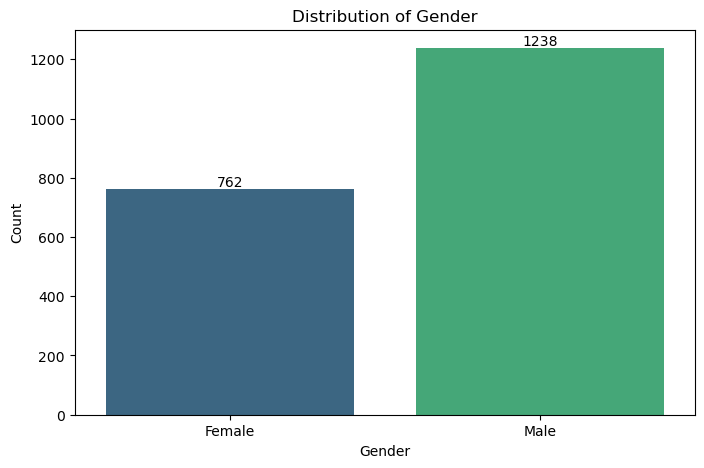


Percentage of Each Gender:
Male      61.9
Female    38.1
Name: Gender, dtype: float64


count     2000
unique       2
top       Male
freq      1238
Name: Gender, dtype: object

In [40]:
### WRITE CODE FOR ANALYSING "GENDER" VARIABLE

# Count plot for visualizing the distribution of gender
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Gender', data=df_one_period, palette='viridis')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Calculate the percentage of each gender
gender_percentage = df_one_period['Gender'].value_counts(normalize=True) * 100

# Display the percentage of each gender
print("\nPercentage of Each Gender:")
print(gender_percentage)

# Summary statistics for the "Gender" variable
Gender_summary = df_one_period['Gender'].describe()
Gender_summary

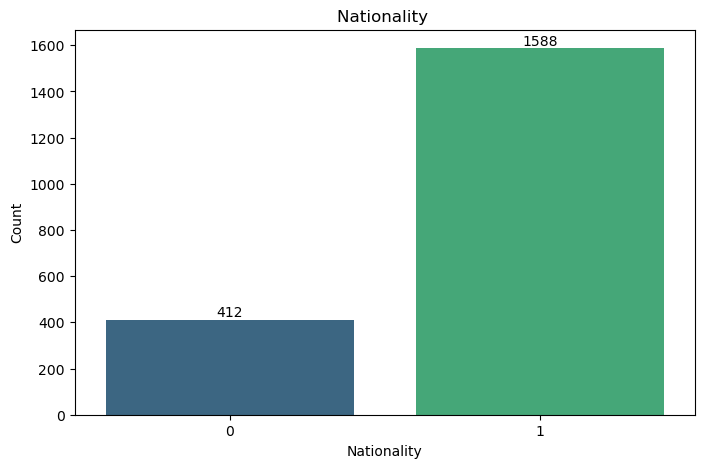


Percentage of Each Nationality:
1    79.4
0    20.6
Name: Nationality, dtype: float64


count    2000.000000
mean        0.794000
std         0.404532
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Nationality, dtype: float64

In [41]:
### WRITE CODE FOR ANALYSING "NATIONALITY" VARIABLE
# Count plot for visualizing the distribution of Nationality
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Nationality', data=df_one_period, palette='viridis')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Nationality ')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.show()

# Calculate the percentage of each Nationality
Nationality_percentage = df_one_period['Nationality'].value_counts(normalize=True) * 100

# Display the percentage of each Nationality
print("\nPercentage of Each Nationality:")
print(Nationality_percentage)

# Summary statistics for the "Nationality" variable.
Nationality_summary = df_one_period['Nationality'].describe()
Nationality_summary

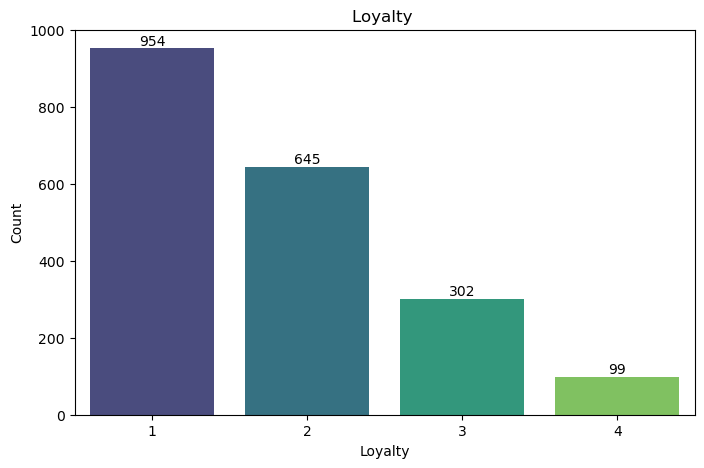


Percentage of Each Loyalty:
1    47.70
2    32.25
3    15.10
4     4.95
Name: Loyalty, dtype: float64


count    2000.00000
mean        1.77300
std         0.88026
min         1.00000
25%         1.00000
50%         2.00000
75%         2.00000
max         4.00000
Name: Loyalty, dtype: float64

In [42]:
### WRITE CODE FOR ANALYSING "LOYALTY"
# Count plot for visualizing the distribution of Loyalty
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Loyalty', data=df_one_period, palette='viridis')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Loyalty ')
plt.xlabel('Loyalty')
plt.ylabel('Count')
plt.show()

# Calculate the percentage of each Loyalty
Loyalty_percentage = df_one_period['Loyalty'].value_counts(normalize=True) * 100

# Display the percentage of each Loyalty
print("\nPercentage of Each Loyalty:")
print(Loyalty_percentage)

# Summary statistics for the "Loyalty" variable
Loyalty_summary = df_one_period['Loyalty'].describe()
Loyalty_summary

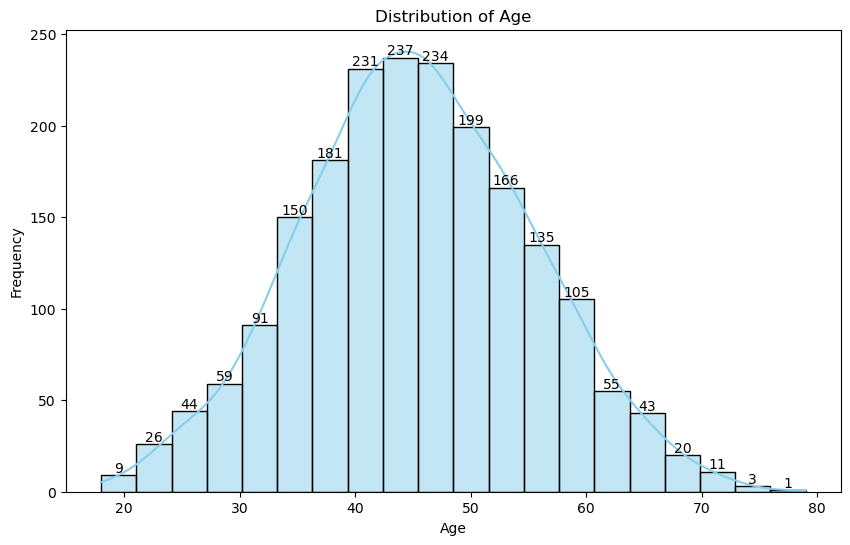

count    2000.000000
mean       45.364000
std         9.958016
min        18.000000
25%        39.000000
50%        45.000000
75%        52.000000
max        79.000000
Name: Age, dtype: float64

In [43]:
### WRITE CODE FOR ANALYSING "AGE"
# Count plot for visualizing the distribution of Age
plt.figure(figsize=(10, 6))
ax = sns.histplot(df_one_period['Age'], bins=20, kde=True, color='skyblue')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Summary statistics for the "Age" variable
age_summary = df_one_period['Age'].describe()
age_summary

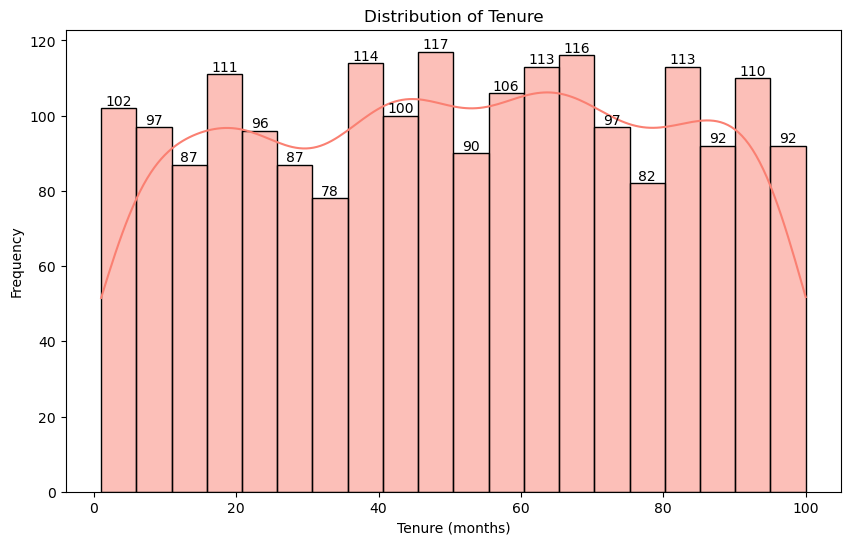


Summary Statistics for Tenure:
count    2000.000000
mean       50.943000
std        28.600503
min         1.000000
25%        26.000000
50%        51.000000
75%        75.000000
max       100.000000
Name: Tenure, dtype: float64


In [44]:
### WRITE CODE FOR ANALYSING "TENURE"
# Histogram for visualizing the distribution of tenure
plt.figure(figsize=(10, 6))
ax = sns.histplot(df_one_period['Tenure'], bins=20, kde=True, color='salmon')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')
plt.show()

# Summary statistics for the "Tenure" variable
tenure_summary = df_one_period['Tenure'].describe()

# Display summary statistics for the "Tenure" variable
print("\nSummary Statistics for Tenure:")
print(tenure_summary)

#### Part II: Exploratory Data Analysis

***Univariate Analysis II: Data summary of customers’ purchase behavior***

   - Use appropriate tables for the summary statistics and graphs and describe customers’ purchase behavior. You may restrict yourself to the univariate analysis of these variables::

          - Amount spent [Spending]
          - Number of bookings [NumBookings]

In [45]:
### For amount spent and number of bookings, we will get 2 values for the same customer
### One for Post = 0 and another for Post = 1
### You can analyze the data separately for Post = 0 and Post = 1 phases
# Separate data for Post = 0 and Post = 1
df_post_0 = df[df['Post'] == 0]
df_post_1 = df[df['Post'] == 1]

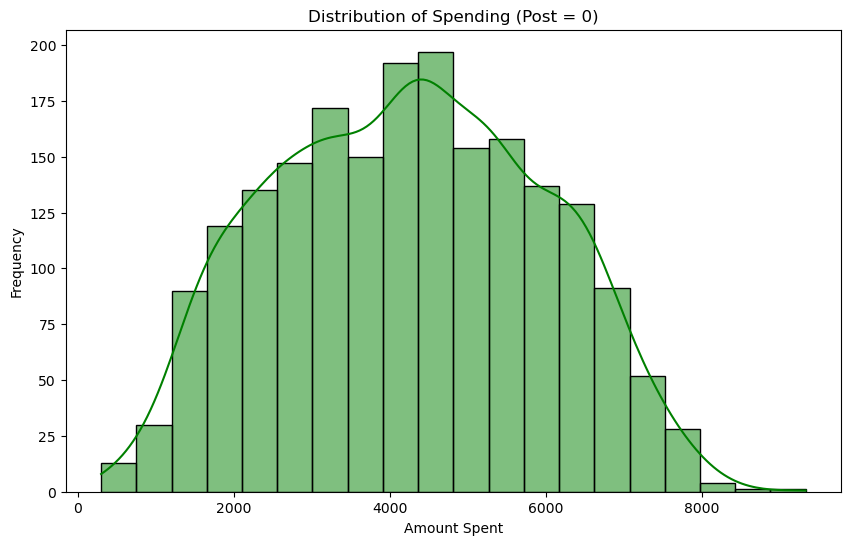


Summary Statistics for Spending (Post = 0):
count    2000.000000
mean     4232.173000
std      1703.973864
min       297.000000
25%      2880.000000
50%      4268.500000
75%      5520.500000
max      9330.000000
Name: Spending, dtype: float64


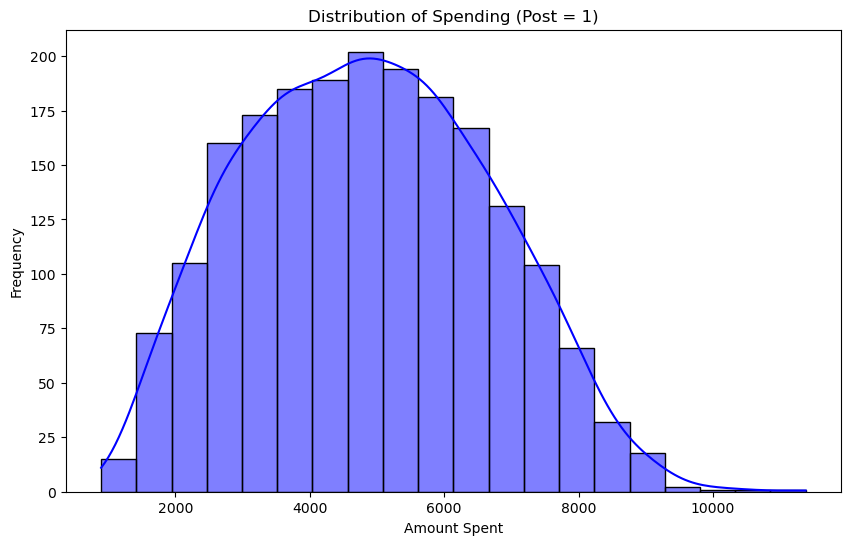


Summary Statistics for Spending (Post = 1):
count     2000.000000
mean      4862.323500
std       1801.456295
min        896.000000
25%       3443.750000
50%       4822.000000
75%       6196.250000
max      11377.000000
Name: Spending, dtype: float64


In [46]:
### WRITE CODE FOR ANALYSING "SPENDING"

# Univariate analysis of the "Spending" variable for Post = 0

# Histogram for visualizing the distribution of spending for Post = 0
plt.figure(figsize=(10, 6))
sns.histplot(df_post_0['Spending'], bins=20, kde=True, color='green')
plt.title('Distribution of Spending (Post = 0)')
plt.xlabel('Amount Spent')
plt.ylabel('Frequency')
plt.show()

# Summary statistics for the "Spending" variable for Post = 0
spending_summary_post_0 = df_post_0['Spending'].describe()

# Display summary statistics for the "Spending" variable for Post = 0
print("\nSummary Statistics for Spending (Post = 0):")
print(spending_summary_post_0)

# Univariate analysis of the "Spending" variable for Post = 1

# Histogram for visualizing the distribution of spending for Post = 1
plt.figure(figsize=(10, 6))
sns.histplot(df_post_1['Spending'], bins=20, kde=True, color='blue')
plt.title('Distribution of Spending (Post = 1)')
plt.xlabel('Amount Spent')
plt.ylabel('Frequency')
plt.show()

# Summary statistics for the "Spending" variable for Post = 1
spending_summary_post_1 = df_post_1['Spending'].describe()

# Display summary statistics for the "Spending" variable for Post = 1
print("\nSummary Statistics for Spending (Post = 1):")
print(spending_summary_post_1)

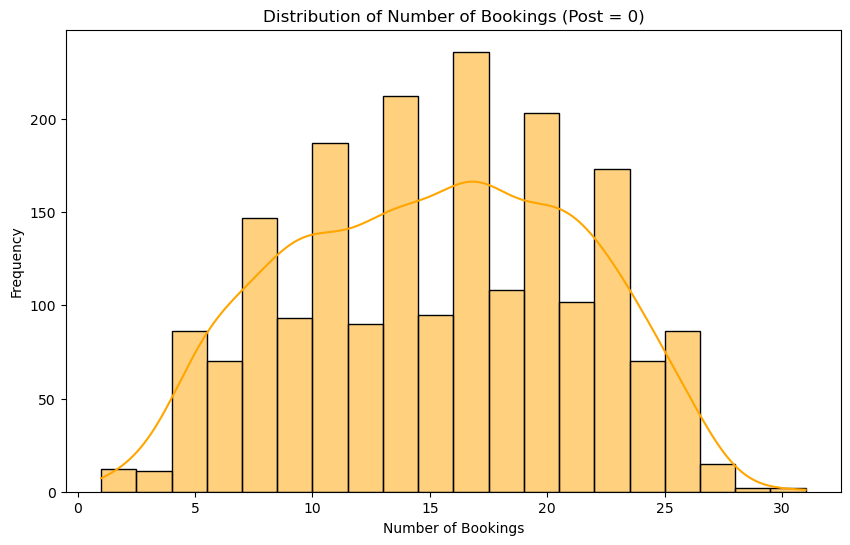


Summary Statistics for Number of Bookings (Post = 0):
count    2000.000000
mean       15.192500
std         6.023669
min         1.000000
25%        10.000000
50%        15.000000
75%        20.000000
max        31.000000
Name: NumBookings, dtype: float64


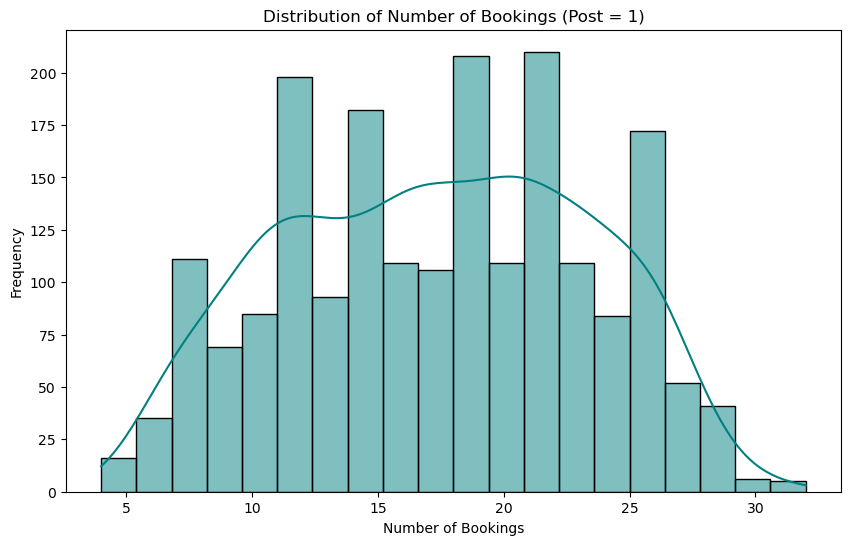


Summary Statistics for Number of Bookings (Post = 1):
count    2000.000000
mean       17.300000
std         6.025791
min         4.000000
25%        12.000000
50%        17.000000
75%        22.000000
max        32.000000
Name: NumBookings, dtype: float64


In [47]:
### WRITE CODE FOR ANALYSING "NUMBOOKINGS"
# Separate data for Post = 0 and Post = 1
df_post_0 = df[df['Post'] == 0]
df_post_1 = df[df['Post'] == 1]

# Univariate analysis of the "NumBookings" variable for Post = 0

# Histogram for visualizing the distribution of the number of bookings for Post = 0
plt.figure(figsize=(10, 6))
sns.histplot(df_post_0['NumBookings'], bins=20, kde=True, color='orange')
plt.title('Distribution of Number of Bookings (Post = 0)')
plt.xlabel('Number of Bookings')
plt.ylabel('Frequency')
plt.show()

# Summary statistics for the "NumBookings" variable for Post = 0
num_bookings_summary_post_0 = df_post_0['NumBookings'].describe()

# Display summary statistics for the "NumBookings" variable for Post = 0
print("\nSummary Statistics for Number of Bookings (Post = 0):")
print(num_bookings_summary_post_0)

# Univariate analysis of the "NumBookings" variable for Post = 1

# Histogram for visualizing the distribution of the number of bookings for Post = 1
plt.figure(figsize=(10, 6))
sns.histplot(df_post_1['NumBookings'], bins=20, kde=True, color='teal')
plt.title('Distribution of Number of Bookings (Post = 1)')
plt.xlabel('Number of Bookings')
plt.ylabel('Frequency')
plt.show()

# Summary statistics for the "NumBookings" variable for Post = 1
num_bookings_summary_post_1 = df_post_1['NumBookings'].describe()

# Display summary statistics for the "NumBookings" variable for Post = 1
print("\nSummary Statistics for Number of Bookings (Post = 1):")
print(num_bookings_summary_post_1)

***Multivariate Analysis:***

   - Construct relevant pivot tables, bar charts, and scatterplots to get a preliminary understanding of the relationship between customers’ characteristics and their purchase behavior. (Generally, bar charts are more informative in the case of categorical variables [e.g., the average of Spending broken up by Gender], while scatterplots convey more information in the case of numerical variables [e.g., Spending versus Age])

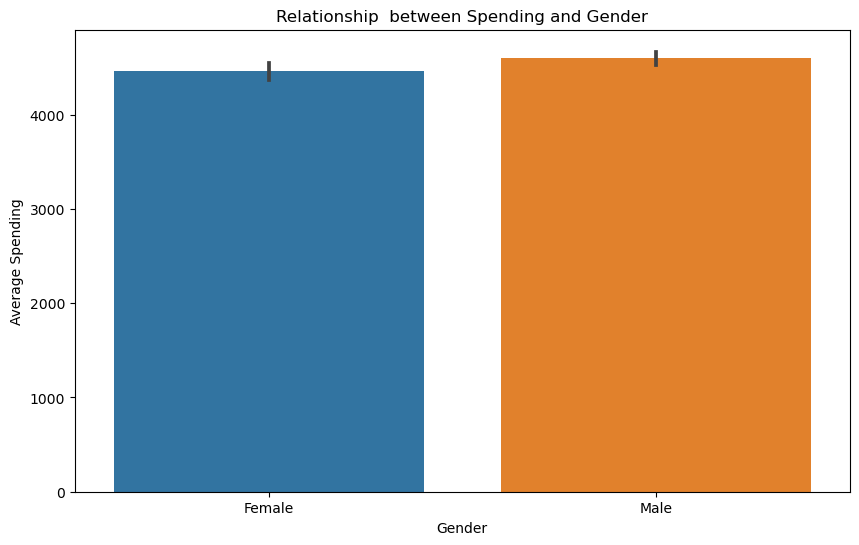

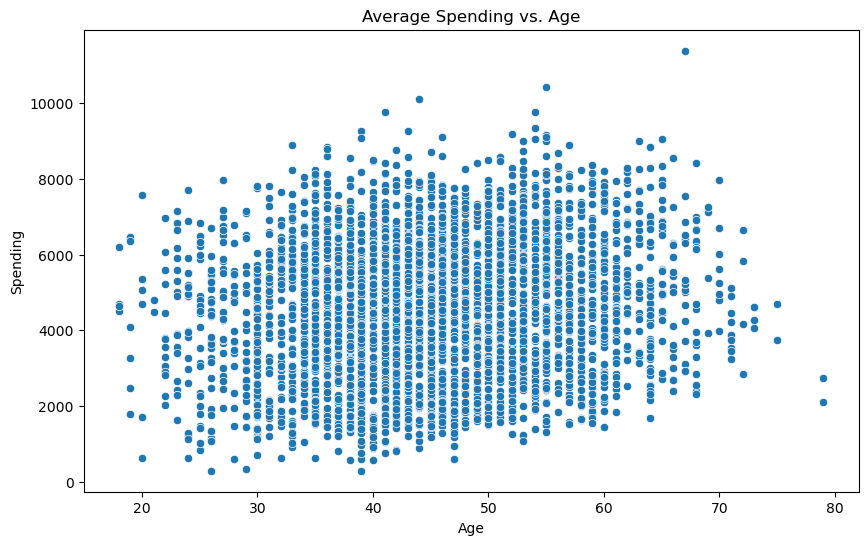

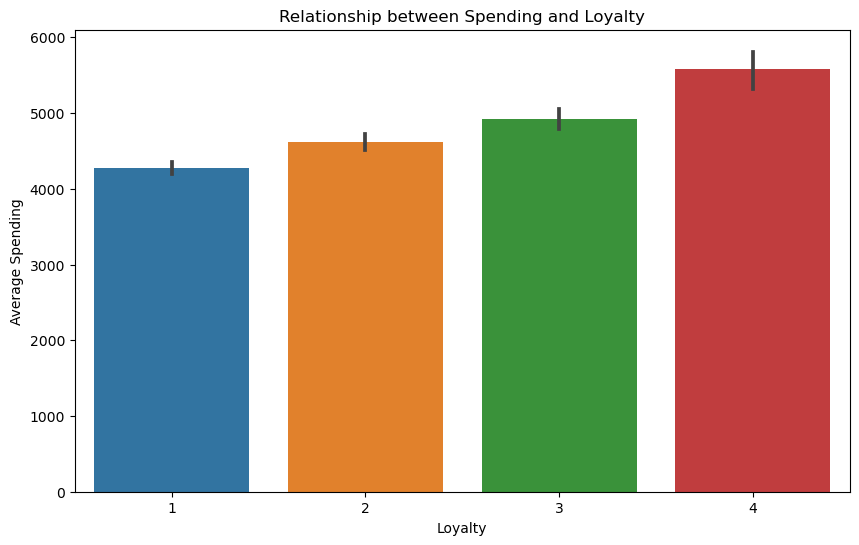

In [48]:
### In this section, you are free to choose the variables you want to analyse and the number of analyses you want to perform.
### For example, you can peform the following analyses.

### Analyze the relationship Spending and Gender.
### Analyze the relationship between Spending and Age.
### Analyze the relationship between Spending and Loyalty.
### .... and so on.

### As suggested before, you are free to choose the variables for analysis.
### Also, you're free to use the necessary tools (either pivot tables or visualizations or both) to perform the analyses
### However, make sure that you analyze the patterns for Spending and Number of Bookings against minimum 3 customer characteristics
# Multivariate analysis of customers' characteristics and purchase behavior

# Bar chart for average Spending by Gender
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Spending', data=df)
plt.title('Relationship  between Spending and Gender')
plt.xlabel('Gender')
plt.ylabel('Average Spending')
plt.show()

# Scatterplot for Spending versus Age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Spending', data=df)
plt.title('Average Spending vs. Age')
plt.xlabel('Age')
plt.ylabel('Spending')
plt.show()


# Bar chart for average Spending by Loyalty
plt.figure(figsize=(10, 6))
sns.barplot(x='Loyalty', y='Spending', data=df)
plt.title('Relationship between Spending and Loyalty')
plt.xlabel('Loyalty')
plt.ylabel('Average Spending')
plt.show()

- Generate a table of the correlations of all numerical variables of the data set.



Correlation Matrix:
               CustomerID         Adopt           Age   Nationality  \
CustomerID   1.000000e+00  8.660255e-01 -4.260377e-02 -1.708152e-02   
Adopt        8.660255e-01  1.000000e+00 -5.022336e-02 -7.417839e-03   
Age         -4.260377e-02 -5.022336e-02  1.000000e+00  1.589144e-02   
Nationality -1.708152e-02 -7.417839e-03  1.589144e-02  1.000000e+00   
Loyalty      1.792886e-02  1.249943e-02 -1.094271e-02 -7.361306e-04   
Tenure      -1.808458e-02 -2.927254e-02 -1.587762e-02 -7.457786e-03   
Post         1.415726e-15  2.682077e-15  1.003517e-15  6.002789e-16   
NumBookings -2.371725e-02 -3.986292e-02  1.497593e-01  3.173407e-02   
Spending     1.375778e-01  1.452519e-01  1.423946e-01  2.804337e-02   

                  Loyalty        Tenure          Post  NumBookings  Spending  
CustomerID   1.792886e-02 -1.808458e-02  1.415726e-15    -0.023717  0.137578  
Adopt        1.249943e-02 -2.927254e-02  2.682077e-15    -0.039863  0.145252  
Age         -1.094271e-02 -1.587

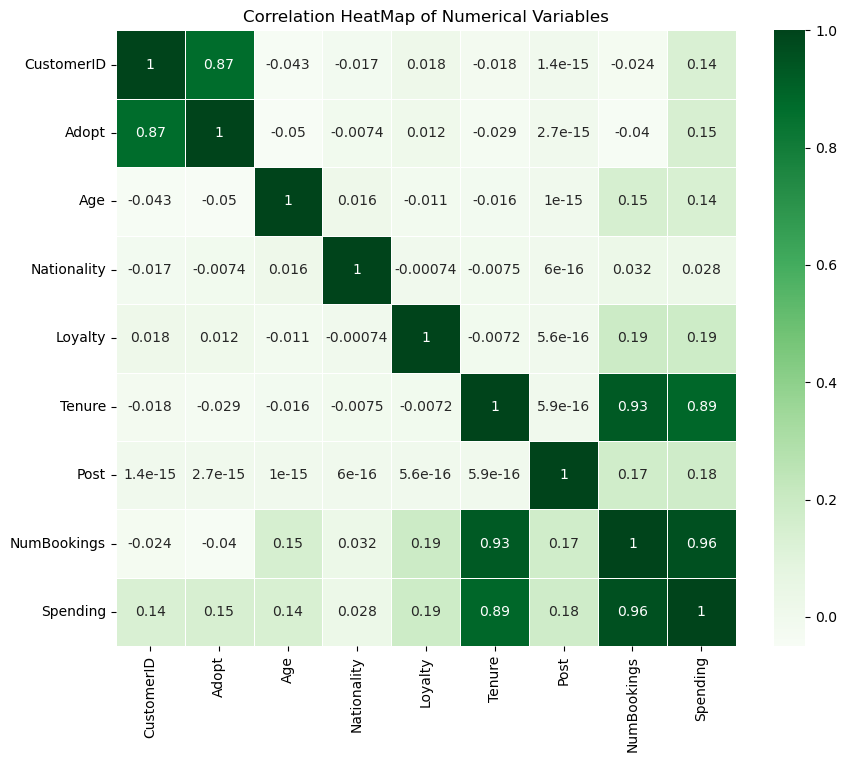

In [49]:
### Subset the dataframe to only include the numerical variables
### After that you can create a correlation matrix.
### If you want, you can also build a HeatMap, but it's optional.
# Subset the dataframe to include only numerical variables
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Display the table of correlations
print("Correlation Matrix:")
print(correlation_matrix)

# Optional: Create a HeatMap for better visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', linewidths=0.5)
plt.title('Correlation HeatMap of Numerical Variables')
plt.show()

 - Determine whether there is a statistically significant difference between the average spending of men and women (at a 5% significance level)? Conduct an appropriate hypothesis test to determine whether there is a difference in means. Please construct a 95% confidence interval for the difference in means. You may assume independent samples and constant variance. [Note: The above test is to be conducted for the entire data set]

In [50]:
### This task may seem intimidating at first.
### However, using the ttest method pingouin package which you learned in the "Designing Business Experiments" module, you should be able to get all the results directly.
import pingouin as pg
pg.ttest(df['Spending'][df['Gender'] == 'Male'], df['Spending'][df['Gender'] == 'Female'])


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.396388,3199.526177,two-sided,0.016615,"[25.31, 253.12]",0.078202,0.639,0.670527


#### Part III: Statistical Analysis

***After-Only design***
   - To determine the treatment effect of customers’ adoption of the app on their spending with the hotel chain, construct a pivot table of average Spending broken up by Adopt and Post. What is the difference between the treatment and control groups’ spending in the Post =1 period? This is the treatment effect, assuming the experiment is of an After-Only design.

In [51]:
### WRITE CODE FOR CONSTRUCTING A PIVOT TABLE
### Hint - Check the documentation of pivot table
### Report the difference between the spending of treatment and control groups in Post = 1 period.
# Create a pivot table to calculate the average spending by Adopt and Post
pivot_table = pd.pivot_table(df, values='Spending', index='Adopt', columns='Post', aggfunc='mean')

# Extract spending for treatment (Adopt=1) and control (Adopt=0) groups in Post = 1 period
treatment_spending_post1 = pivot_table.loc[1, 1]
control_spending_post1 = pivot_table.loc[0, 1]

# Calculate the treatment effect
treatment_effect = treatment_spending_post1 - control_spending_post1

# Print the pivot table
print("Pivot Table:")
print(pivot_table)

# Print the treatment effect
print("\nTreatment Effect (Difference in spending between treatment and control groups in Post = 1 period):")
print(treatment_effect)

Pivot Table:
Post          0         1
Adopt                    
0      4188.753  4388.343
1      4275.593  5336.304

Treatment Effect (Difference in spending between treatment and control groups in Post = 1 period):
947.9610000000002


  - Is the above treatment effect statistically significant? Perform the necessary hypothesis test and construct a 95% confidence interval for the difference. Take the level of significance as 0.05

In [52]:
### Hint - Once again, you can use the ttest method in the pingouin package to perform this task quickly.
from scipy import stats


# Create a DataFrame for treatment (Adopt=1) and control (Adopt=0) groups in Post = 1 period
treatment_group = df[(df['Adopt'] == 1) & (df['Post'] == 1)]['Spending']
control_group = df[(df['Adopt'] == 0) & (df['Post'] == 1)]['Spending']

# Perform a t-test
t_statistic, p_value = stats.ttest_ind(treatment_group, control_group, equal_var=False)

# Calculate the degrees of freedom
df_treatment = len(treatment_group) - 1
df_control = len(control_group) - 1
degrees_of_freedom = min(df_treatment, df_control)

# Calculate the standard error
std_error = ((treatment_group.var() / len(treatment_group)) + (control_group.var() / len(control_group))) ** 0.5

# Calculate the margin of error
margin_of_error = stats.t.ppf(0.975, degrees_of_freedom) * std_error

# Calculate the confidence interval
confidence_interval = (treatment_group.mean() - control_group.mean() - margin_of_error,
                       treatment_group.mean() - control_group.mean() + margin_of_error)

# Print results
print("Hypothesis Test Results:")
print(f"P-value: {p_value}")
print(f"T-statistic: {t_statistic}")

print("\n95% Confidence Interval for the Difference:")
print(confidence_interval)

# Here the same test is done with different way to cross check the values.
pg.ttest(treatment_group ,control_group)

Hypothesis Test Results:
P-value: 5.2415587903937674e-33
T-statistic: 12.193523040050568

95% Confidence Interval for the Difference:
(795.4026977171014, 1100.519302282899)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,12.193523,1998,two-sided,4.868695e-33,"[795.5, 1100.43]",0.545311,4.544e+29,1.0


***Before-After design***


- Construct a new DataFrame, where for each customer, you have a new variable, which is the difference in spending between the Post = 1 and Post= 0 periods.


In [53]:
### This task can be slightly challenging and hence for performing this we have suggested the following approach
### Step 1 - Create 2 separate temporary dataframes, each filtered by Post = 1 and Post = 0 periods
### Step 2 - Merge these two dataframes using the pandas.merge() method based on the "CustomerID" and store this in a new Dataframe
### Step 3 - After merging, you may encounter repeated columns (denoted by a suffix like "_x" & "_y" ). Identify which ones you want to keep
###, and which ones you want to drop. Make sure you keep the Spending columns for both Post = 1 and Post = 0 periods.
### Step 4 - In the new merged Dataframe, create a new column which is the difference between the Spending in Post = 1 and Post = 0 for each customer
### For ease of use, you can name this column as "Diff". This will be useful in the final task of this section


# Step 1: Create 2 separate temporary DataFrames for Post = 1 and Post = 0 periods
post1_df = df[df['Post'] == 1][['CustomerID', 'Spending', 'Adopt']]
post0_df = df[df['Post'] == 0][['CustomerID', 'Spending', 'Adopt']]

# Step 2: Merge the two DataFrames based on "CustomerID"
merged_df = pd.merge(post1_df, post0_df, on='CustomerID', suffixes=('_Post1', '_Post0'))

# Step 3: Drop repeated columns, keeping Spending columns for both Post = 1 and Post = 0 periods
# You can customize this based on the columns you want to keep
merged_df = merged_df[['CustomerID', 'Spending_Post1', 'Spending_Post0', 'Adopt_Post1', 'Adopt_Post0']]

# Step 4: Create a new column "Diff" for the difference in spending between Post = 1 and Post = 0
merged_df['Diff'] = merged_df['Spending_Post1'] - merged_df['Spending_Post0']

# Print the new DataFrame
print("New DataFrame with Difference in Spending:")
print(merged_df)


New DataFrame with Difference in Spending:
      CustomerID  Spending_Post1  Spending_Post0  Adopt_Post1  Adopt_Post0  \
0           1001            5760            3976            1            1   
1           1002            1830            1455            1            1   
2           1003            2682            1656            1            1   
3           1004            6846            5148            1            1   
4           1005            3377            1782            1            1   
...          ...             ...             ...          ...          ...   
1995         996            1488            1420            0            0   
1996         997            4403            4395            0            0   
1997         998            4370            5166            0            0   
1998         999            5020            4896            0            0   
1999        1000            1446            1470            0            0   

      Diff  
0     1

The above suggested approach is one of the many ways in which you can complete this task. Here are some helpful links for understanding how to use the `pandas.merge` method
- [Documentation](https://pandas.pydata.org/docs/reference/api/pandas.merge.html)
- [Youtube tutorial](https://www.youtube.com/watch?v=h4hOPGo4UVU)

---

- Compute the average spending difference between those with Adopt = 1 and those with Adopt = 0 in both the Post = 1 and Post = 0 periods. Call these differences Difference1 and Difference0. Compute the difference between these two differences as Difference1 – Difference0. This is the treatment effect in the Before-After design.

In [54]:
### To understand what why you're doing this, you can use the following image as a reference
### You have already learned this in the second session of the Designing Business Experiments module
### This is how you evaluate the treatment effect( or, Lift) in a Before-After Design


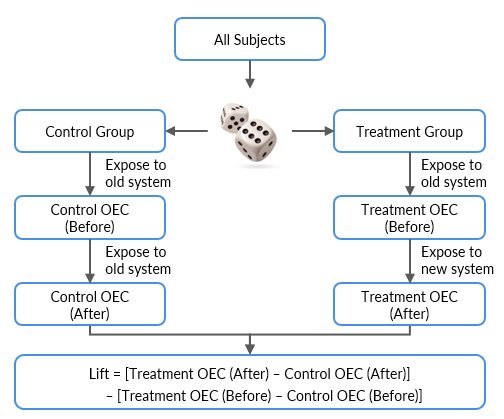

In case the above image isn't opening please use this [link](https://images.upgrad.com/48d5bfcc-c3e5-4ef3-9c5a-460568c08480-Image2.png)


In [55]:
## Once you go through the image, the task is fairly straightforward to do. Here is one of the suggested approaches
## Calculate the average spending for Customers from control group (Adopt = 0) in the period Post = 0
## Calculate the average spending for Customers from treamtent group (Adopt = 1) in the period Post = 0
## Calculate the difference between the above two values. This will be Difference0 (or Treatment OEC(Before) - Control OEC (Before))

## After the above, repeat the same steps for Post = 1 period
## Calculate the average spending for Customers from control group (Adopt = 0) in the period Post = 1
## Calculate the average spending for Customers from treamtent group (Adopt = 1) in the period Post = 1
## Calculate the difference between the above two values. This will be Difference1 (or Treatment OEC(After) - Control OEC (After))

### Finally calculate the difference between these two values (Difference1 - Difference0) to obtain the treatment effect.

# Calculate Difference0 (Control OEC (Before))
control_post_0 = df[(df['Adopt'] == 0) & (df['Post'] == 0)]['Spending'].mean()

treatment_post_0 = df[(df['Adopt'] == 1) & (df['Post'] == 0)]['Spending'].mean()

# Calculate Difference1 (Treatment OEC (After))
treatment_post_1 = df[(df['Adopt'] == 1) & (df['Post'] == 1)]['Spending'].mean()

# Calculate Difference0 (Control OEC (After))
control_post_1 = df[(df['Adopt'] == 0) & (df['Post'] == 1)]['Spending'].mean()

# Calculate Difference0 - Difference0 (or Treatment OEC (Before) - Control OEC (Before))
treatment_effect1 = treatment_post_0 - control_post_0

# Calculate Difference1 - Difference1 (or Treatment OEC (After) - Control OEC (After))
treatment_effect2 = treatment_post_1 - control_post_1

# Calculate the difference between treatment_effect2 and treatment_effect1 to obtain the Treatment effect.
Total_Difference = treatment_effect2 - treatment_effect1

# Display the results
print(f'Difference0 (Control OEC Before): {control_post_0}')
print(f'Difference0 (Treatment OEC Before): {treatment_post_0}')
print(f'Difference0 (Control OEC After): {control_post_1}')
print(f'Difference1 (Treatment OEC After): {treatment_post_1}')
print(f'Difference0 - Difference0 (Treatment OEC (Before) - Control OEC (Before)): {treatment_effect1}')
print(f'Difference1 - Difference1 (Treatment OEC (After) - Control OEC (After)): {treatment_effect2}')
print(f'Treatment 1 - Treatment 2 (Treatment Effect): {Total_Difference}')

Difference0 (Control OEC Before): 4188.753
Difference0 (Treatment OEC Before): 4275.593
Difference0 (Control OEC After): 4388.343
Difference1 (Treatment OEC After): 5336.304
Difference0 - Difference0 (Treatment OEC (Before) - Control OEC (Before)): 86.84000000000015
Difference1 - Difference1 (Treatment OEC (After) - Control OEC (After)): 947.9610000000002
Treatment 1 - Treatment 2 (Treatment Effect): 861.1210000000001


- Is the above treatment effect statistically significant? Similar to the previous step, perform the necessary hypothesis test and construct a 95% confidence interval for the difference in differences. Take the level of significance as 0.05

In [56]:
### Once again, you can peform this task using the pingouin package
### In addition, you can use the "Diff" column from new DataFrame that you created in the first task of this section
### This will help in providing inputs to the ttest method from pingouin package.
adopt0ttest = merged_df[merged_df["Adopt_Post0"] == 0]
adopt1ttest = merged_df[merged_df["Adopt_Post1"] == 1]
pg.ttest(adopt1ttest.Diff,adopt0ttest.Diff  , paired = True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,30.285769,999,two-sided,1.828852e-143,"[805.33, 916.92]",1.354689,3.478e+139,1.0
